# Advanced Data Analysis
- Metadata Analysis
- Sort
- Merge
- Replace and Assign the data
- Rename, Drop and Keep the variables
- Reorder and add new variables
- Subsetting / Slicing
- Groupby - count, mean, descriptive statistics, first record

In [1]:
### Import packages
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import xport  ## write sas datasets to local drive

## Metadata of DataFrame
It is like proc contents. <br>

In [2]:
df_tteos = pd.read_sas('./data/raw/adtteos.sas7bdat', format='sas7bdat', encoding='utf-8')

In [3]:
print("\n List of columns: \n ", df_tteos.columns)
print("\n Shape of input data: \n", df_tteos.shape) ## 300 records and 17 columns


 List of columns: 
  Index(['SUBJID', 'SITEID', 'FASFL', 'SAFFL', 'TRTP', 'TRTPN', 'PARAM',
       'PARAMCD', 'PARAMTYP', 'AVISIT', 'AVISITN', 'AVAL', 'STARTDT', 'ADT',
       'ADTF', 'CNSR', 'EVNTDESC'],
      dtype='object')

 Shape of input data: 
 (300, 17)


In [4]:
## Metadata of input data
print("Information of input data:"); print(df_tteos.info())
print("\n Description of numeric columns of input data: \n", df_tteos.describe())

Information of input data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SUBJID    300 non-null    object        
 1   SITEID    300 non-null    object        
 2   FASFL     300 non-null    object        
 3   SAFFL     300 non-null    object        
 4   TRTP      300 non-null    object        
 5   TRTPN     300 non-null    float64       
 6   PARAM     300 non-null    object        
 7   PARAMCD   300 non-null    object        
 8   PARAMTYP  300 non-null    object        
 9   AVISIT    300 non-null    object        
 10  AVISITN   300 non-null    float64       
 11  AVAL      300 non-null    float64       
 12  STARTDT   300 non-null    datetime64[ns]
 13  ADT       300 non-null    datetime64[ns]
 14  ADTF      35 non-null     object        
 15  CNSR      300 non-null    float64       
 16  EVNTDESC  300 non-null    object   

In [5]:
## first and last 5 records
print("\nFirst five data: \n", df_tteos.head())
print("\nLast five data: \n", df_tteos.tail())


First five data: 
     SUBJID SITEID FASFL SAFFL        TRTP  TRTPN          PARAM PARAMCD  \
0  310-001    310     Y     Y     Control    1.0  Days to Death   DEATH   
1  310-002    310     Y     Y     Control    1.0  Days to Death   DEATH   
2  310-003    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
3  310-004    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
4  310-005    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   

  PARAMTYP               AVISIT  AVISITN  AVAL    STARTDT        ADT ADTF  \
0  DERIVED  Double-Blind Period     91.0   1.0 2007-11-12 2007-11-12  NaN   
1  DERIVED  Double-Blind Period     91.0  83.0 2008-01-11 2008-04-02  NaN   
2  DERIVED  Double-Blind Period     91.0  84.0 2008-02-01 2008-04-24  NaN   
3  DERIVED  Double-Blind Period     91.0   9.0 2008-02-07 2008-02-15  NaN   
4  DERIVED  Double-Blind Period     91.0  51.0 2008-02-21 2008-04-11  NaN   

   CNSR                       EVNTDESC  
0   0.0                  

### Data Manipulation

In [6]:
raw3 = {'subjid': ['01-001', '01-001', '01-002', '01-002'],
        'visitnum': [1,2,1,2],
        'blood pressure': ['150','151','146','145']
       }
df3 = pd.DataFrame(raw3)
print(df3)
## prepare raw data - not sorted
raw4 = {'subjid': ['01-001', '01-001', '01-002', '01-002', '01-002' ],
        'visitnum': [1,2,2,1,3],
        'weight': ['180','181','160','158','160']
       }
df4 = pd.DataFrame(raw4)
print(df4)

   subjid  visitnum blood pressure
0  01-001         1            150
1  01-001         2            151
2  01-002         1            146
3  01-002         2            145
   subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
2  01-002         2    160
3  01-002         1    158
4  01-002         3    160


### Sort

In [7]:
df4_2 = df4.sort_values(by=['subjid','visitnum'], ascending=True)
print(df4_2)

#df4.sort_values(by=['subjid','visitnum'], ascending=True, inplace=True) ##Overwriting the current data
#print(df4)

   subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
3  01-002         1    158
2  01-002         2    160
4  01-002         3    160


### Merge - inner merge with two key variables

In [8]:
## Merge by two key variables
df_merged_2 = pd.merge(df3, df4, on=('subjid', 'visitnum'), how='inner') ## merging by two columns. Data does not need to be sorted
print(df_merged_2)

   subjid  visitnum blood pressure weight
0  01-001         1            150    180
1  01-001         2            151    181
2  01-002         1            146    158
3  01-002         2            145    160


## Replacing data with new variables

In [30]:
## set up raw data frame
raw1 = {'subjid': ['01-001', '01-002', '01-003', '01-004'],
        'severity code': [1,2,2,3],
       }
df1 = pd.DataFrame(raw1)
print(df1)

   subjid  severity code
0  01-001              1
1  01-002              2
2  01-003              2
3  01-004              3


In [31]:
## Relacing values : 1 
code_to_severity = {
    1 : 'Mild', 2 : 'Moderate', 3:'Severe'
}
df1['Severity Desc 1']= df1['severity code'].map(code_to_severity)
print(df1)

   subjid  severity code Severity Desc 1
0  01-001              1            Mild
1  01-002              2        Moderate
2  01-003              2        Moderate
3  01-004              3          Severe


In [32]:
## Relacing values : 2
code = [1,2,3]; desc = ['Mild', 'Moderate','Severe']
df1['Severity Desc 2']= df1['severity code'].replace(code, desc)
print(df1)

   subjid  severity code Severity Desc 1 Severity Desc 2
0  01-001              1            Mild            Mild
1  01-002              2        Moderate        Moderate
2  01-003              2        Moderate        Moderate
3  01-004              3          Severe          Severe


In [40]:
## Relacing values : 3
df1['Severity Desc 3']= df1['severity code'].apply(lambda x: 'Mild' if x == 1 
                                                   else 'Moderate' if x==2 else 'Severe' if x==3 else '')
print(df1)

   subjid  severity code Severity Desc 1 Severity Desc 2 Severity Desc 3  \
0  01-001              1            Mild            Mild            Mild   
1  01-002              2        Moderate        Moderate        Moderate   
2  01-003              2        Moderate        Moderate        Moderate   
3  01-004              3          Severe          Severe          Severe   

  Severity Desc 4 Severity Desc 5  
0            Mild            Mild  
1        Moderate        Moderate  
2        Moderate        Moderate  
3          Severe          Severe  


In [34]:
## Relacing values : 4
for index, _df1 in df1.iterrows():    
    ## Create age group
    if _df1['severity code'] ==1 :
        df1.loc[index, 'Severity Desc 4'] = 'Mild'
    elif _df1['severity code'] ==2:
        df1.loc[index, 'Severity Desc 4'] = 'Moderate'
    elif _df1['severity code'] ==3 :        
        df1.loc[index, 'Severity Desc 4'] = 'Severe'
    else:
        df1.loc[index, 'Severity Desc 4'] = ''
df1

,subjid,severity code,Severity Desc 1,Severity Desc 2,Severity Desc 3,Severity Desc 4
0,01-001,1,Mild,Mild,Mild,Mild
1,01-002,2,Moderate,Moderate,Moderate,Moderate
2,01-003,2,Moderate,Moderate,Moderate,Moderate
3,01-004,3,Severe,Severe,Severe,Severe


In [35]:
## Replacing values : 5
df1.loc[df1['severity code']==1, 'Severity Desc 5'] = 'Mild'
df1.loc[df1['severity code']==2, 'Severity Desc 5'] = 'Moderate'
df1.loc[df1['severity code']==3, 'Severity Desc 5'] = 'Severe'
df1

,subjid,severity code,Severity Desc 1,Severity Desc 2,Severity Desc 3,Severity Desc 4,Severity Desc 5
0,01-001,1,Mild,Mild,Mild,Mild,Mild
1,01-002,2,Moderate,Moderate,Moderate,Moderate,Moderate
2,01-003,2,Moderate,Moderate,Moderate,Moderate,Moderate
3,01-004,3,Severe,Severe,Severe,Severe,Severe


### Creating variables using two variables

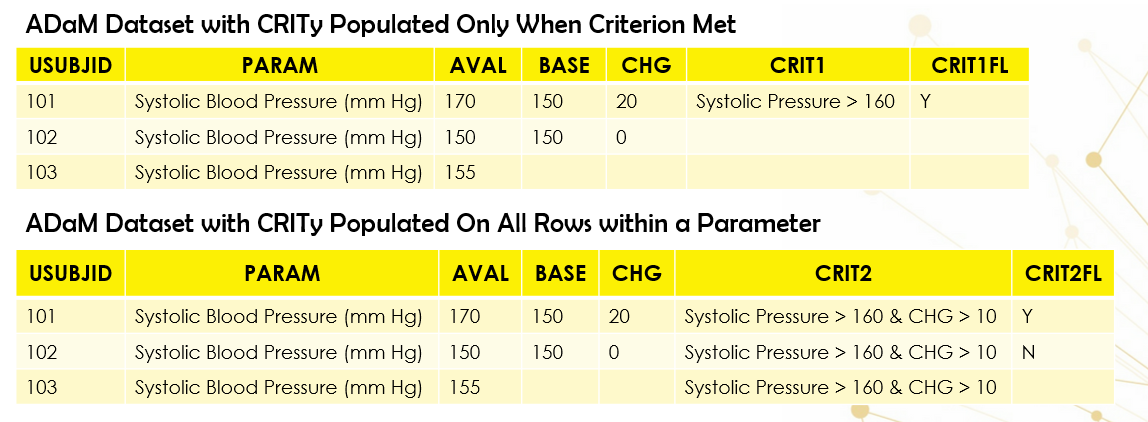

In [36]:
## creating dataframe from dictionaries
raw = {'USUBJID': ['01-001', '01-002', '01-003'],
      'PARAM': ['Systolic Blood Pressure (mm Hg)','Systolic Blood Pressure (mm Hg)','Systolic Blood Pressure (mm Hg)'],
      'AVAL': [170, 150, 155],
      'BASE': [150, 150, np.NaN],
      'CHG' : [20, 0, np.NaN]}
df5 = DataFrame(raw)
print(df5)

  USUBJID                            PARAM  AVAL   BASE   CHG
0  01-001  Systolic Blood Pressure (mm Hg)   170  150.0  20.0
1  01-002  Systolic Blood Pressure (mm Hg)   150  150.0   0.0
2  01-003  Systolic Blood Pressure (mm Hg)   155    NaN   NaN


In [39]:
## Use Lambda
#axis = 1 is required for row manipulation
df5['CRIT1'] = df5[['AVAL','CHG']].apply(lambda row: 'Systolic Pressure > 160 & CHG > 10' 
                                         if row.AVAL > 160 and row.CHG > 10 else '', axis=1) 
df5['CRIT1FL'] = df5[['AVAL','CHG']].apply(lambda row: 'Y' 
                                           if row.AVAL > 160 and row.CHG > 10 else '', axis=1) 
df5

,USUBJID,PARAM,AVAL,BASE,CHG,CRIT1,CRIT1FL
0,01-001,Systolic Blood Pressure (mm Hg),170,150.0,20.0,Systolic Pressure > 160 & CHG > 10,Y
1,01-002,Systolic Blood Pressure (mm Hg),150,150.0,0.0,,
2,01-003,Systolic Blood Pressure (mm Hg),155,NaN,NaN,,


In [41]:
## Using iterative function
for index, _df5 in df5.iterrows():    
    df5.loc[index, 'CRIT2'] = 'Systolic Pressure > 160 & CHG 10'
    if _df5.AVAL > 160 and _df5.CHG > 10 :
        df5.loc[index, 'CRIT2FL'] = 'Y'
    elif  np.isnan(_df5.AVAL) or np.isnan(_df5.CHG) : ## checking Null value (np.NaN)
        df5.loc[index, 'CRIT2FL'] = ''   
    elif _df5.AVAL is not None and _df5.CHG is not None :
        df5.loc[index, 'CRIT2FL'] = 'N'   
    else :
        df5.loc[index, 'CRIT2FL'] = ''

df5

,USUBJID,PARAM,AVAL,BASE,CHG,CRIT1,CRIT1FL,CRIT2,CRIT2FL
0,01-001,Systolic Blood Pressure (mm Hg),170,150.0,20.0,Systolic Pressure > 160 & CHG > 10,Y,Systolic Pressure > 160 & CHG 10,Y
1,01-002,Systolic Blood Pressure (mm Hg),150,150.0,0.0,,,Systolic Pressure > 160 & CHG 10,N
2,01-003,Systolic Blood Pressure (mm Hg),155,NaN,NaN,,,Systolic Pressure > 160 & CHG 10,


### How to rename, drop, keep, re-order, and columns/variables

In [42]:
## Rename variables
df2 = df1.rename(columns = {'Severity Desc 4': 'Severity Description 4'})
df2

,subjid,severity code,Severity Desc 1,Severity Desc 2,Severity Desc 3,Severity Description 4,Severity Desc 5
0,01-001,1,Mild,Mild,Mild,Mild,Mild
1,01-002,2,Moderate,Moderate,Moderate,Moderate,Moderate
2,01-003,2,Moderate,Moderate,Moderate,Moderate,Moderate
3,01-004,3,Severe,Severe,Severe,Severe,Severe


In [43]:
## Drop variables
df2.drop(columns=['Severity Desc 2', 'Severity Desc 3'], inplace=True)
df2

,subjid,severity code,Severity Desc 1,Severity Description 4,Severity Desc 5
0,01-001,1,Mild,Mild,Mild
1,01-002,2,Moderate,Moderate,Moderate
2,01-003,2,Moderate,Moderate,Moderate
3,01-004,3,Severe,Severe,Severe


In [44]:
## Keep variables in the different order
df3 = df2[['subjid', 'Severity Description 4', 'severity code']]
df3

,subjid,Severity Description 4,severity code
0,01-001,Mild,1
1,01-002,Moderate,2
2,01-003,Moderate,2
3,01-004,Severe,3


In [48]:
### Add the new variable 
#df3['siteid'] = '01'
df3.loc[:,'siteid'] = '01'
df3

C:\Users\kevin\anaconda3\envs\python-training\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,subjid,Severity Description 4,severity code,siteid
0,01-001,Mild,1,01
1,01-002,Moderate,2,01
2,01-003,Moderate,2,01
3,01-004,Severe,3,01


### Subsetting / Slicing

In [49]:
raw2 = {'subjid': ['01-001', '01-002', '01-003', '01-004'],
        'severity_code': [1,2,2,3],
       }
df4 = pd.DataFrame(raw2)
print(df4)

   subjid  severity_code
0  01-001              1
1  01-002              2
2  01-003              2
3  01-004              3


In [50]:
## using Query function
df4_1 =df4.query('severity_code == 2')
print(df4_1)

   subjid  severity_code
1  01-002              2
2  01-003              2


In [51]:
df4_2 =df4[df4.severity_code == 2]
print(df4_2)

   subjid  severity_code
1  01-002              2
2  01-003              2


### Groupby function
df_tteos.groupby(['TRTP', 'SITEID'])['SUBJID'].count()) <br>
is similar to <br>
proc sql; select trtp, siteid, count(subjid) from df_tteos group by trtp, siteid;

In [52]:
## Frequency of columns
print("Frequency count of TRTP : \n", df_tteos['TRTP'].value_counts())
## proc freq data=df_tteos; table TRTP;run

Frequency count of TRTP : 
 Study Drug    152
Control       148
Name: TRTP, dtype: int64


In [53]:
## Group by 
print("\nFrequency count of Subjects by TRTP and SITEID: \n", df_tteos.groupby(['TRTP', 'SITEID'])['SUBJID'].count())  
## proc sql; select trtp, siteid, count(subjid) from df_tteos group by trtp, siteid; quit;


Frequency count of Subjects by TRTP and SITEID: 
 TRTP        SITEID
Control     310        5
            311       18
            313       16
            314       14
            315       10
            316        2
            317        2
            318        3
            319        7
            320       15
            321        1
            323       11
            325       12
            326       11
            327        2
            328        9
            340        4
            341        2
            342        2
            343        2
Study Drug  310        6
            311       18
            313       17
            314       13
            315       10
            316        3
            317        1
            318        5
            319        8
            320       15
            321        2
            323       14
            325       11
            326        9
            327        1
            328        9
            340        4
     

In [55]:
## other gropuby function
print("\nAverage time to event day per treatment: \n", df_tteos.groupby(['TRTP'])['AVAL'].mean())  
print("\nMedian time to event day per treatment: \n", df_tteos.groupby(['TRTP'])['AVAL'].median())  
print("\nDescriptive statistics per treatment: \n", df_tteos.groupby(['TRTP'])['AVAL'].describe()) 


Average time to event day per treatment: 
 TRTP
Control       45.729730
Study Drug    45.513158
Name: AVAL, dtype: float64

Median time to event day per treatment: 
 TRTP
Control       40.5
Study Drug    45.0
Name: AVAL, dtype: float64

Descriptive statistics per treatment: 
             count       mean        std  min    25%   50%   75%   max
TRTP                                                                 
Control     148.0  45.729730  34.319546  1.0  10.75  40.5  84.0  96.0
Study Drug  152.0  45.513158  33.485588  1.0  13.00  45.0  83.0  92.0


In [56]:
## First record by trtp and siteid
df_tteos_f = df_tteos.groupby(['TRTP', 'SITEID']).first()
df_tteos_f2 = df_tteos_f.reset_index()
df_tteos_f2.head()

,TRTP,SITEID,SUBJID,FASFL,SAFFL,TRTPN,PARAM,PARAMCD,PARAMTYP,AVISIT,AVISITN,AVAL,STARTDT,ADT,ADTF,CNSR,EVNTDESC
0,Control,310,310-001,Y,Y,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,1.0,2007-11-12,2007-11-12,None,0.0,DEATH
1,Control,311,311-002,Y,Y,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,81.0,2007-10-30,2008-01-18,Y,1.0,COMPLETE PERIOD WITHOUT EVENT
2,Control,313,313-001,Y,Y,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,1.0,2007-09-03,2007-09-03,None,0.0,DEATH
3,Control,314,314-001,Y,Y,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,1.0,2007-09-07,2007-09-07,Y,0.0,LOST TO FOLLOW-UP
4,Control,315,315-002,Y,Y,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,12.0,2008-08-04,2008-08-15,Y,0.0,LOST TO FOLLOW-UP


In [63]:
print("\nNumber of CNSR values by Treatment: \n", df_tteos.groupby(['TRTP'])['CNSR'].count())
print("\nNumber of distinct CNSR values by Treatment: \n",df_tteos.groupby(['TRTP'])[ 'CNSR'].nunique())


Number of CNSR values by Treatment: 
 TRTP
Control       148
Study Drug    152
Name: CNSR, dtype: int64

Number of distinct CNSR values by Treatment: 
 TRTP
Control       2
Study Drug    2
Name: CNSR, dtype: int64
